# Model Training on the Titanic Dataset

## Imports and settings

In [22]:
# Setup the environment
import time
from dotenv import load_dotenv
load_dotenv()

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s", datefmt='%H:%M:%S,')

In [23]:
import sys
sys.path.append('/Users/solene.leboucher/Desktop/DSBA/MLOps/dsba-platform/src')


In [24]:
import os
os.environ["DSBA_MODELS_ROOT_PATH"] = "/Users/solene.leboucher/dsba-platform/models_registry"

## Data Loading and Exploration

In [25]:
# Data loading
from dsba.data_ingestion import load_csv_from_url
titanic_dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
titanic = load_csv_from_url(titanic_dataset_url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
# Download the dataset 
from dsba.data_ingestion.files import write_csv_to_path
write_csv_to_path(titanic, "/Users/solene.leboucher/Desktop/DSBA/MLOps/dsba-platform/models_registry/titanic.csv")

In [27]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

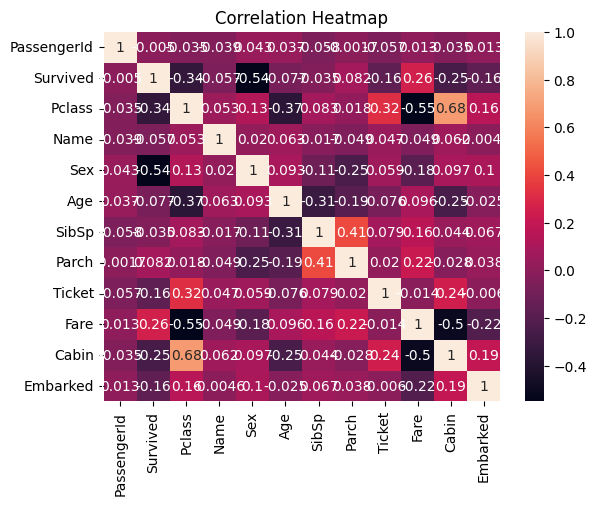

In [28]:
# Plot the correlation
from dsba.preprocessing import preprocess_dataframe
from dsba.preprocessing import plot_correlation

titanic_enc = preprocess_dataframe(titanic)

plot_correlation(titanic_enc)

In [29]:
# Problem setting
from dsba.preprocessing import split_dataframe
titanic_train, titanic_test = split_dataframe(titanic, test_size=0.2)
target_column = "Survived"

In [30]:
# Fill the NA and scale the data, for numeric columns 
from dsba.preprocessing import fillna_and_standardize
titanic_train, titanic_test = fillna_and_standardize(titanic_train, titanic_test, target_column)

## Training of the models

### XGBoost

In [31]:
# Training
from dsba.model_training import train_simple_classifier
clf, metadata = train_simple_classifier(titanic_train, target_column, "titanic_model_xgboost")

10:06:45, [INFO] Start training a simple classifier
10:06:45, [INFO] Done training a simple classifier


### Logistic Regression

In [32]:
# Train the logistic regression
from dsba.model_training import train_logistic_regression
clf2, metadata2 = train_logistic_regression(titanic_train, target_column, "titanic_model_logistic_regression_grid_search")

10:06:49, [INFO] Start training a logistic regression
10:06:49, [INFO] Best hyperparameters found: {'C': 0.1, 'max_iter': 1000}


### Random Forest

In [33]:
# Train the random forest
from dsba.model_training import train_random_forest
clf_rf, metadata_rf = train_random_forest(titanic_train, target_column, "titanic_model_random_forest")

10:06:55, [INFO] Start training a random forest classifier
10:06:56, [INFO] Best hyperparameters found for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


## Model saving

In [34]:
# Add the simple model to the platform
from dsba.model_registry import save_model
save_model(clf, metadata)

10:07:01, [INFO] Save model to path: /Users/solene.leboucher/dsba-platform/models_registry/titanic_model_xgboost.pkl


In [35]:
# Add the logistic regression to the platform
save_model(clf2, metadata2)

10:07:03, [INFO] Save model to path: /Users/solene.leboucher/dsba-platform/models_registry/titanic_model_logistic_regression_grid_search.pkl


In [36]:
# Add the random forest to the platform
save_model(clf_rf, metadata_rf)

10:07:04, [INFO] Save model to path: /Users/solene.leboucher/dsba-platform/models_registry/titanic_model_random_forest.pkl


## Model Evaluation

### XGBoost

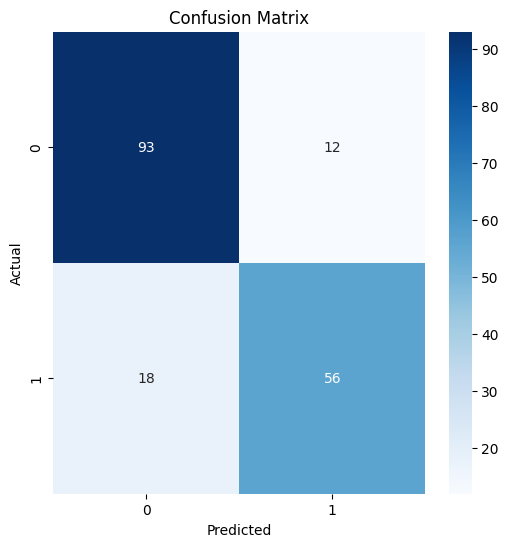

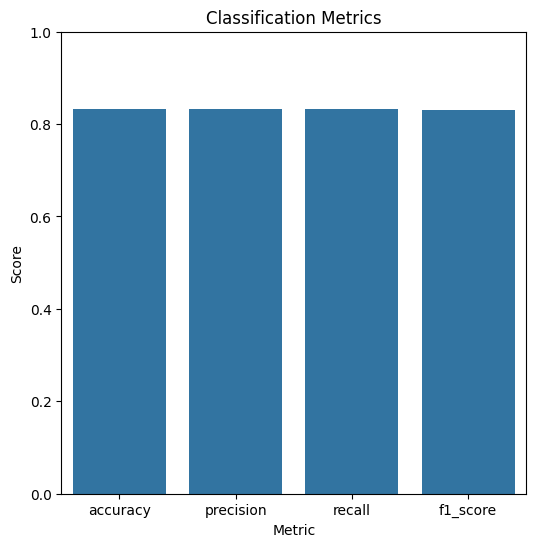

In [37]:
# Evaluate the XGBoost model
from dsba.model_evaluation import evaluate_classifier
from dsba.model_evaluation import visualize_classification_evaluation

model_evaluation = evaluate_classifier(clf, target_column, titanic_test)
visualize_classification_evaluation(model_evaluation)

### Logistic Regression

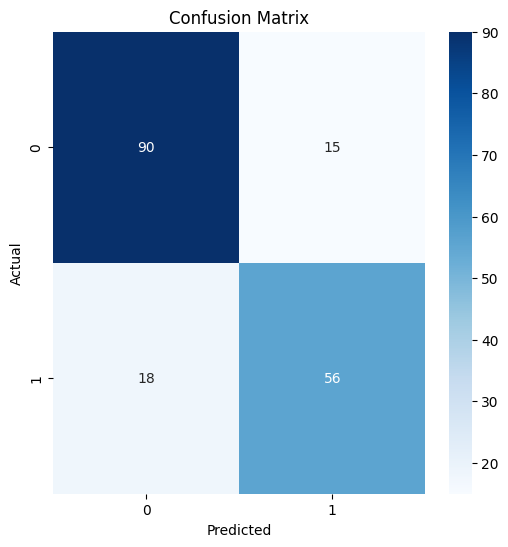

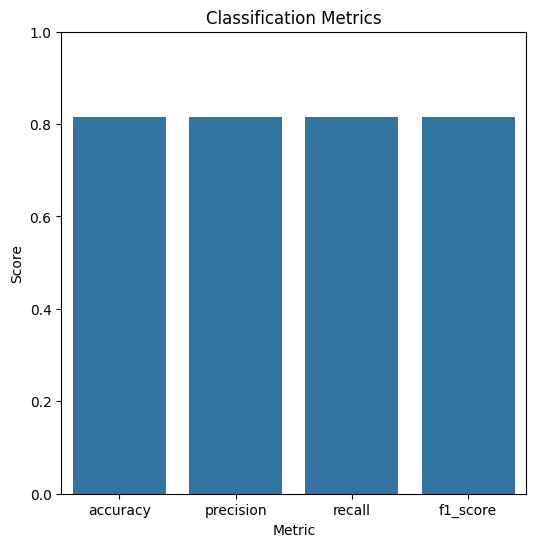

In [38]:
# Evaluate the logistic regression
model_evaluation2 = evaluate_classifier(clf2, target_column, titanic_test)
visualize_classification_evaluation(model_evaluation2)

### Random Forest

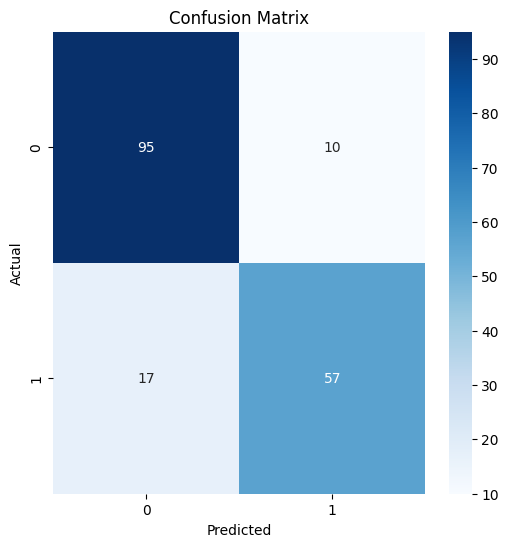

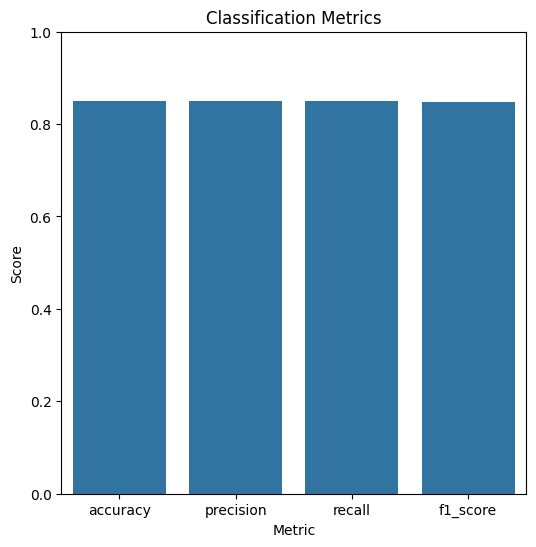

In [39]:
# Evaluate the random forest
model_evaluation = evaluate_classifier(clf_rf, target_column, titanic_test)
visualize_classification_evaluation(model_evaluation)